In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gera_matriz(ł, N):
    A = np.zeros((N, N))
    for i in range(N):
        A[i, i] = 1 + 2*ł
    for i in range(1, N):
        A[i, i-1] = -ł
    for i in range(0, N-1):
        A[i, i+1] = -ł
    return A

In [3]:
lamb = 0.5
N = 5
A = gera_matriz(1, N)
A = A/3
A[1][0] = A[2][1] = A[3][2] = A[4][3] = 0
A

array([[ 1.        , -0.33333333,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        , -0.33333333,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , -0.33333333,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        , -0.33333333],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ]])

In [4]:
def decomporLDL(ł, N):

    # L e D Vetores
    D = np.zeros(N)
    L = np.zeros(N-1)


    # Condição inicial para prossegir com os cálculos
    D[0] = D[0]

    # Cálculo dos valores dos vetores L e D
    for i in range (1, len(D)):
        D[i] = D[0] - (((L[0]/ł)**2)*ł)
    
    for i in range (0, len(L)):
        L[i] = L[0]/ł

    # Criação das matrizes L e D a partir dos vetores
    D_matriz = np.zeros((N, N))
    L_matriz = np.zeros((N, N))

    for i in range (0, N):
        D_matriz[i][i] = D[i]
        L_matriz[i][i] = 1      # A matriz L deve ter 1's na diagonal principal
    
    for i in range (0, N-1):
        L_matriz[i+1][i] = L[i] #Colocando a subdiagonal de L

    LT_matriz = np.transpose(L_matriz)

    return (L_matriz, D_matriz, LT_matriz)
def invert_diagonal(M):
    inverse = np.diag(np.ones((M.shape[0])))
    for i in range(M.shape[0]):
        try:
            inverse[i][i] = 1/M[i][i]
        except Exception as e:
            print(e)
    return inverse

def invert_bidiagonal(M, type):
    inverse = np.diag(np.ones((M.shape[0])))
    if type == "lower":
        M = np.transpose(M)
        inverse = invert_bidiagonal(M, "upper")
        return np.transpose(inverse)

    elif type == "upper":
        for i in range(M.shape[0] - 1):
            inverse[i][i+1] = -M[i][i+1]
        for k in range(2, M.shape[0]):
            for i in range(M.shape[0] - k):
                inverse[i][k+i] = inverse[i][k+i-1]*inverse[i+1][k+i]/inverse[i+1][k+i-1]

        return inverse


In [20]:
N = 10
lamb = 0.5
x_total = t_total = 1
item = 'a'

In [21]:
invert_bidiagonal(A, "upper")

array([[1.        , 0.33333333, 0.11111111, 0.03703704, 0.01234568],
       [0.        , 1.        , 0.33333333, 0.11111111, 0.03703704],
       [0.        , 0.        , 1.        , 0.33333333, 0.11111111],
       [0.        , 0.        , 0.        , 1.        , 0.33333333],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [22]:
item = 'a'
cond_ini(0.5, 20)

0.0625

In [23]:
def funcao_fonte(x_pt, t, N): # funcao de entrada
    global item
    #return 10*(x_pt**2)*(x_pt-1) - 60*x_pt*t + 20*t
    if item == 'a':
        return 10*(np.cos(10*t))*(x_pt**2)*((1-x_pt)**2) - (1+(np.sin(10*t)))*(12*(x_pt**2)-12*x_pt+2) # item a
    elif item == 'b':
        return (np.exp(t-x_pt)*(-np.sin(5*t*x_pt)*5*x_pt - 10*t*np.sin(5*t*x_pt)+np.cos(5*t*x_pt)*25*t*t))   # item b
    elif item == 'c':
        if x_pt == int(N*0.25):
            return (10000*(1 - 2*t*t))/delta_x
        else:
            return 0


def funcao_exata(x, t):
    #return (10*t*x*x*(x-1))
    if item =='a':
        return ((1 + np.sin(10*t))*(x**2)*((1-x)**2))
    elif item == 'b':
        return np.exp(t-x)*np.cos(5*t*x)

def gera_matriz_funcao_exata(M, N, delta_t, delta_x):
    f_exata = np.zeros((int(M)+1, int(N)+1), dtype='float64')
    for i in range(1, int(M)+1):
        t = (i-1)*delta_t
        for j in range(1, int(N)+1):
            x = j*delta_x
            f_exata[i][j] = funcao_exata(x, t)
    for i in range (0,N): # para todos os x's analisados
        f_exata[0][i] = cond_ini(i*delta_x, N)

    for j in range(0, int(M)+1): # para todos os t's analisados
        f_exata[j][0] = g1(j*delta_t)
        f_exata[j][N] = g2(j*delta_t)
    return f_exata

def cond_ini (x, N):
    #return ((x**2)*((1-x)**2))
    if item =='a':
        return ((x**2)*((1-x)**2))
    elif item =='b':
        return np.exp(-x)       
    elif item == 'c':
        return funcao_fonte(x, 0, N)

def g1(t): # condição de contorno, x=0
    
    if item == 'a' or item == 'c':
        return 0
    elif item =='b': 
        return (np.exp(t))

def g2(t): # condição de contorno, x=1
    
    if item =='a' or item == 'c':
        
        return 0
    elif item =='b':

        return (np.exp(t-1)*np.cos(5*t))

'''
A decomposição LDLt recebe

- a: Vetor com a diagonal principal da matriz
- b: Vetor com a subdiagonal da matriz

E retorna
- L: matriz bidiagonal inferior
- D: Matriz diagonal
- Lt: A transposta de L
'''

def decomporLDL(ł, N):
    # L e D Vetores
    D = np.zeros(N)
    L = np.zeros(N-1)

    # Condição inicial para prossegir com os cálculos
    D[0] = 1 + 2*ł
    # Cálculo dos valores dos vetores L e D
    for i in range (1, len(D)):
        D[i] = 1+2*ł - (((-ł/D[i-1])**2)*D[i-1])
    
    for i in range (0, len(L)):
        L[i] = -ł/D[i]

    # Criação das matrizes L e D a partir dos vetores
    D_matriz = np.zeros((N, N))
    L_matriz = np.zeros((N, N))

    for i in range (0, N):
        D_matriz[i][i] = D[i]
        L_matriz[i][i] = 1      # A matriz L deve ter 1's na diagonal principal
    
    for i in range (0, N-1):
        L_matriz[i+1][i] = L[i] #Colocando a subdiagonal de L

    LT_matriz = np.transpose(L_matriz)

    return (L_matriz, D_matriz, LT_matriz)


def invert_diagonal(M):
    inverse = np.diag(np.ones((M.shape[0])))
    for i in range(M.shape[0]):
        try:
            inverse[i][i] = 1/M[i][i]
        except Exception as e:
            print(e)
    return inverse


def invert_bidiagonal(M, type):
    inverse = np.diag(np.ones((M.shape[0])))
    if type == "lower":
        M = np.transpose(M)
        inverse = invert_bidiagonal(M, "upper")
        return np.transpose(inverse)

    elif type == "upper":
        for i in range(M.shape[0] - 1):
            inverse[i][i+1] = -M[i][i+1]
        for k in range(2, M.shape[0]):  
            for i in range(M.shape[0] - k):
                inverse[i][k+i] = inverse[i][k+i-1]*inverse[i+1][k+i]/inverse[i+1][k+i-1]

        return inverse


In [24]:
v = np.zeros((N-1))                    
M = N
L, D, Lt = decomporLDL(lamb, N - 1)
for k in range (0,int(M)): # para cada intervalo de tempo
    t = (k+1)*delta_t
    v[0] =  (1-lamb)*matriz[k][1] + lamb*(matriz[k][0] + g1(k*delta_t) + matriz[k][2])/2 + delta_t*(funcao_fonte(delta_x, k*delta_t, N-1) + funcao_fonte(delta_x, t, N-1))/2
    v[N-2] = (1-lamb)*matriz[k][N-1] + lamb*(matriz[k][N] + g2(k*delta_t) + matriz[k][N-2])/2 + delta_t*(funcao_fonte((N-1)*delta_x, k*delta_t, N-1) + funcao_fonte((N-1)*delta_x, t, N-1))/2
    for j in range(1, N-2): # para cada x
        x = j*delta_x
        v[j] = (1-lamb)*matriz[k][j] + lamb*(matriz[k][j-1] - 2*matriz[k][j] + matriz[k][j+1])/2 + delta_t*(funcao_fonte(x, k*delta_t, N-1) + funcao_fonte(x, t, N-1))
    

#     aux = np.dot(invert_bidiagonal(L, "lower"), v)
#     aux = np.dot(invert_diagonal(D), aux)
#     matriz[k+1][0:N-1] = np.dot(invert_bidiagonal(Lt, "upper"), aux) # elementor [1, N-1]

In [25]:
print("Calculo para N={}, lambda={}".format(N, lamb))
delta_x = x_total/N     # resolucao espacial do analise
M = N         # numero de instantes de tempo analisados
delta_t = delta_x     # resolucao temporal da analise

# ####### zolubas
# M = (N**2)/lamb         # numero de instantes de tempo analisados
# delta_x = x_total/N     # resolucao espacial do analise
# delta_t = t_total/M     # resolucao temporal da analise

                # Variaveis para acompanhar o andamento do processo
               
matriz = np.zeros((int(M)+1, int(N)+1), dtype='float64')    # inicializacao da matriz
for i in range (0,N+1):                                       # para todos os x's analisados
    matriz[0][i] = cond_ini(i*delta_x, N)

for j in range(0, int(M)+1):                                # para todos os t's analisados
    matriz[j][0] = g1(j*delta_t)
    matriz[j][N] = g2(j*delta_t)

Calculo para N=10, lambda=0.5


In [26]:
def solve(A, b, m_type):
    if A.shape[0] != A.shape[1]:
        print("Erro, matriz nao quadrada!")
        return -1
    solution = np.zeros((A.shape[0]))
    if m_type == "lower":
        solution[0] = b[0]/A[0][0]
        for i in range(1, A.shape[0]):
            solution[i] = b[i] - A[i][i-1]*solution[i-1]
        return solution
    
    elif m_type == "upper":
        
        solution[A.shape[0] - 1] = b[A.shape[0]-1]/A[A.shape[0] - 1][A.shape[0] - 1]
        for i in range(2, A.shape[0]-1):
            j = A.shape[0] - i
            solution[j] = b[j] - A[j][j+1]*solution[j+1]
        return solution
    
    elif m_type == "diagonal":
        for i in range(A.shape[0]):
            solution[i] = b[i]/A[i][i]
        return solution

In [27]:
v = np.zeros((N-1))                    

L, D, Lt = decomporLDL(lamb, N - 1)
for k in range (0,int(M)): # para cada intervalo de tempo
    t = (k+1)*delta_t
    v[0] =  matriz[k][1] + 0.5*lamb*(matriz[k+1][0] + matriz[k][0] - 2*matriz[k][1]+ matriz[k][2]) + 0.5*delta_t*(funcao_fonte(delta_x, k*delta_t, N-1) + funcao_fonte(delta_x, t, N-1))
    for j in range(0, N-1): # para cada x
        x = j*delta_x
        #v[j] = (1-lamb)*matriz[k][j] + lamb*(matriz[k][j-1] - 2*matriz[k][j] + matriz[k][j+1])/2 + delta_t*(funcao_fonte(x, k*delta_t, N-1) + funcao_fonte(x, t, N-1))
        v[j] = matriz[k][j] + 0.5*lamb*(matriz[k][j-1] - 2*matriz[k][j] + matriz[k][j+1]) + 0.5*delta_t*(funcao_fonte(x, k*delta_t, N-1) + funcao_fonte(x, t, N-1))
    
    v[N-2] = matriz[k][N-1] + 0.5*lamb*(matriz[k+1][N] + matriz[k][N] - 2*matriz[k][N-1] + matriz[k][N-2]) + 0.5*delta_t*(funcao_fonte((N-1)*delta_x, k*delta_t, N-1) + funcao_fonte((N-1)*delta_x, t, N-1))
    

    y = solve(L, v, "lower")
    z = solve(D, y, "diagonal")
    matriz[k+1][0:N-1] = solve(Lt, z, "upper")

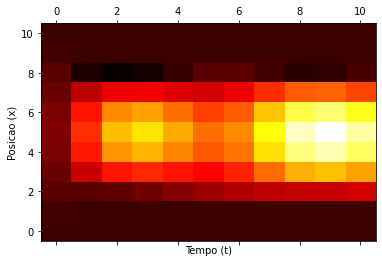

In [28]:
plt.figure()
plt.xlabel("Tempo (t)")
plt.ylabel("Posicao (x)")
plt.matshow(np.transpose(matriz), fignum = 0, interpolation = 'none', cmap = 'hot', origin = 'lower', aspect="auto")

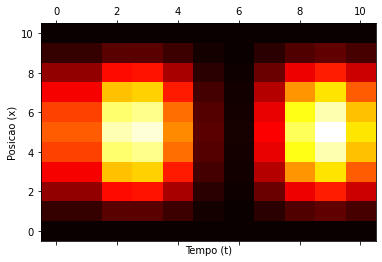

In [29]:
matriz_ideal = gera_matriz_funcao_exata(M, N, delta_t, delta_x)
matriz_ideal = np.transpose(matriz_ideal)
plt.xlabel("Tempo (t)")
plt.ylabel("Posicao (x)")
plt.matshow(matriz_ideal, fignum = 0, interpolation = 'none', cmap = 'hot', origin = 'lower', aspect="auto")

In [30]:
M = gera_matriz(lamb/2, N-1)
M

array([[ 1.5 , -0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.25,  1.5 , -0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.25,  1.5 , -0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.25,  1.5 , -0.25,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , -0.25,  1.5 , -0.25,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.25,  1.5 , -0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.25,  1.5 , -0.25,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.25,  1.5 , -0.25],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.25,  1.5 ]])

In [ ]:
matriz[0,:]

In [ ]:
matriz[1,:]

In [ ]:
matriz_ideal[1,:]

In [ ]:
np.dot(M, matriz[1,0:N-1])

In [ ]:
v

In [ ]:
np.dot(M, matriz_ideal[1,0:N-1])

In [ ]:
np.dot(np.linalg.inv(M), v)

In [ ]:
np.dot(L, np.dot(D, Lt))